In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
data = pd.read_csv('bank_full.csv', delimiter=';')
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [4]:
print(data.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


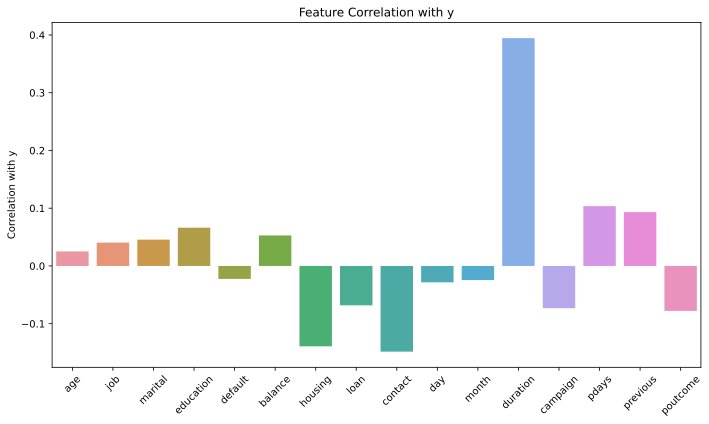

In [5]:
df = pd.DataFrame(data)

# Convert categorical variables to numerical using label encoding
for column in df.select_dtypes(include=['object']).columns:
    df[column] = pd.Categorical(df[column]).codes

# Calculate correlation with 'y'
correlation = df.corr()['y'].drop('y')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=45)
plt.ylabel('Correlation with y')
plt.title('Feature Correlation with y')
plt.tight_layout()
plt.show()

In [5]:
# 检查重复值
duplicates = data.duplicated()
print("重复值：")
print(data[duplicates])

# 检查缺失值
missing_values = data.isnull().sum()
print("\n缺失值数量：")
print(missing_values)

# no missing values and duplicates

重复值：
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

缺失值数量：
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# check duplicates
duplicates_count = data.duplicated().sum()
print(f"Total number of duplicated rows: {duplicates_count}")

Total number of duplicated rows: 0


In [7]:
# check missing values
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_df)

           Missing Values  Percentage (%)
age                     0             0.0
job                     0             0.0
marital                 0             0.0
education               0             0.0
default                 0             0.0
balance                 0             0.0
housing                 0             0.0
loan                    0             0.0
contact                 0             0.0
day                     0             0.0
month                   0             0.0
duration                0             0.0
campaign                0             0.0
pdays                   0             0.0
previous                0             0.0
poutcome                0             0.0
y                       0             0.0


In [ ]:
# 计算各类别的数量
category_counts = data['y'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0) 
plt.show()

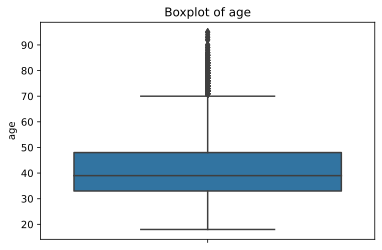

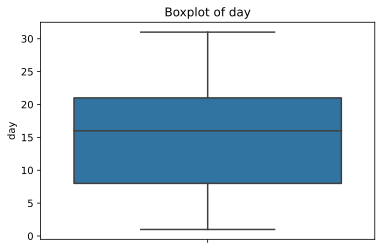

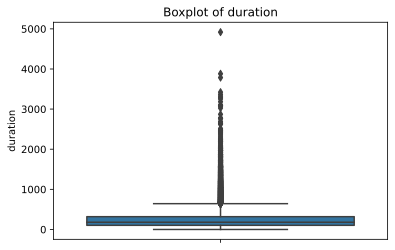

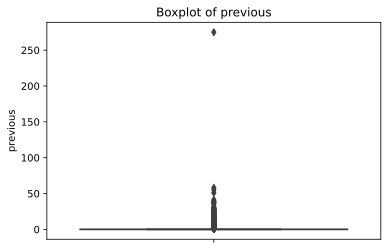

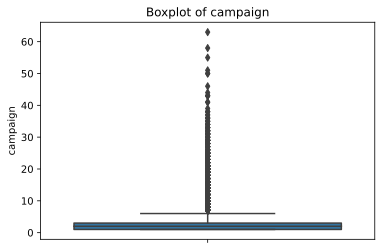

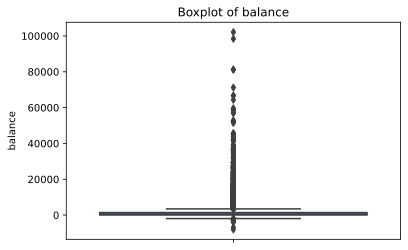

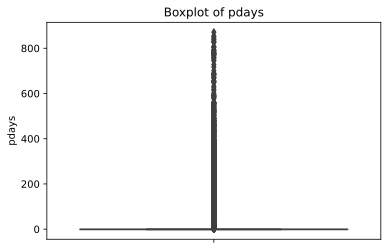

In [8]:
continuous_features = {'age','balance','duration','day','campaign','pdays','previous'}
# Print boxplots based on the values of y
for feature in continuous_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(y = feature, data=data)
    plt.title('Boxplot of '+feature) 
    plt.xticks(rotation=0) 
    plt.show()

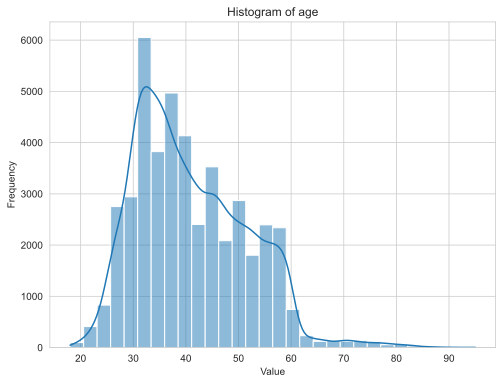

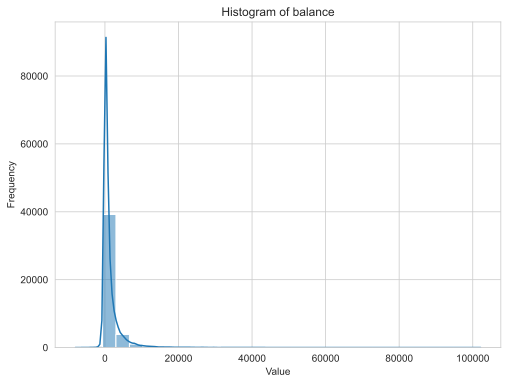

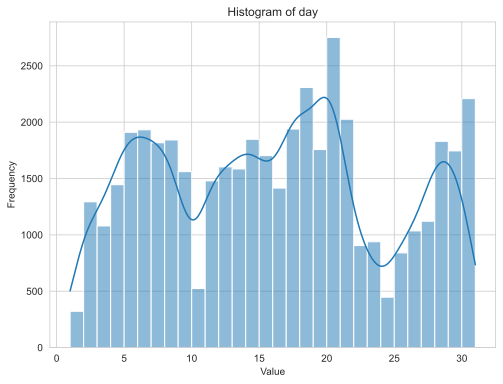

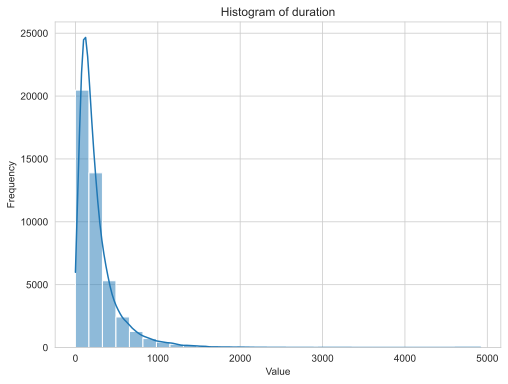

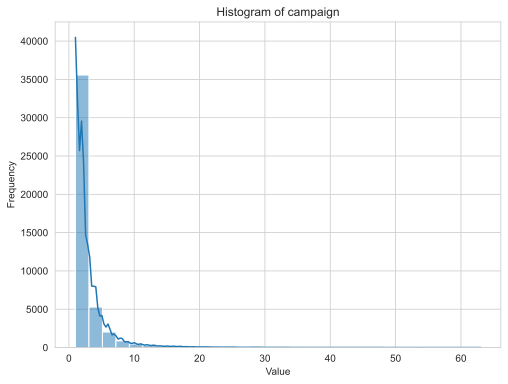

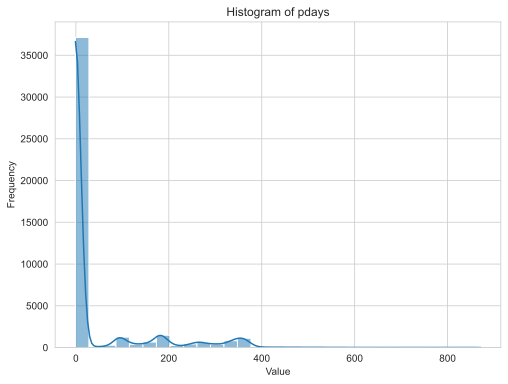

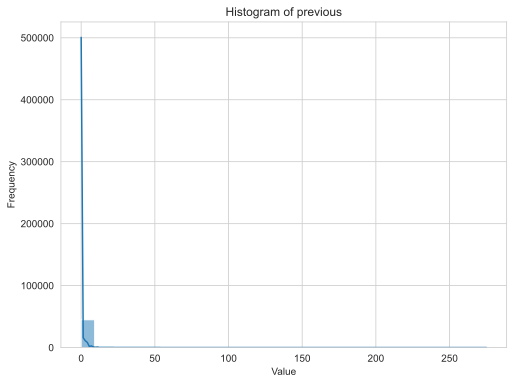

In [25]:
# 定义连续特征的集合
continuous_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# 设置图像风格
sns.set_style("whitegrid")

# 对于每个特征，画出其直方图
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title('Histogram of ' + feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

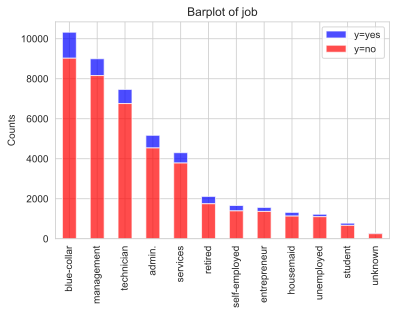

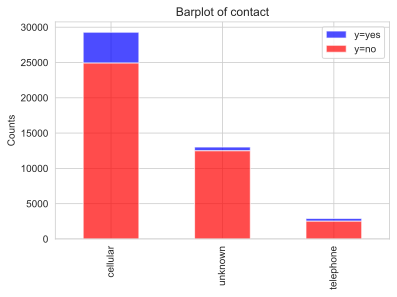

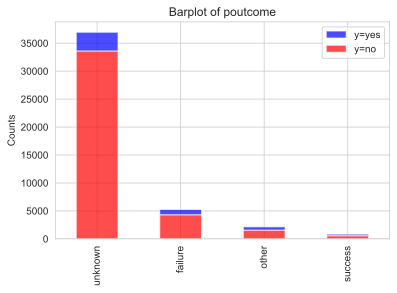

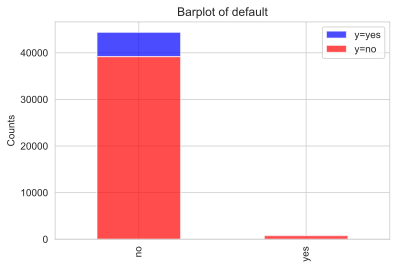

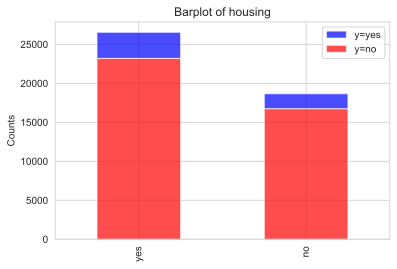

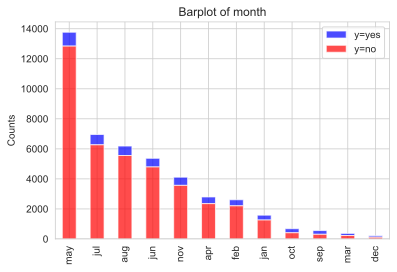

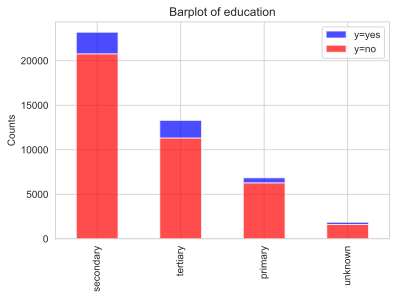

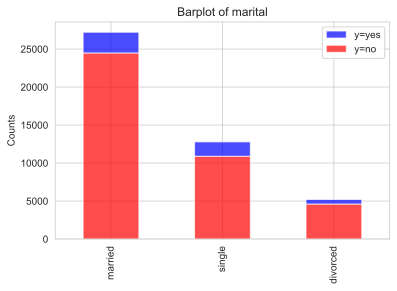

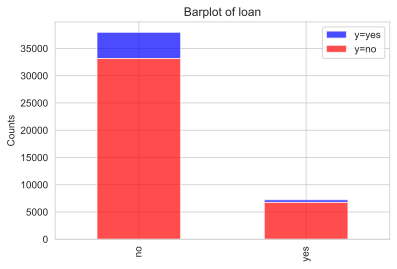

In [26]:
discrete_features = {'job','marital','education','default','housing','loan','contact','month','poutcome'}
for feature in discrete_features:
    plt.figure(figsize=(6, 4))
    #data[feature].value_counts().plot(kind='bar', color='skyblue')
    counts_yes = data[data['y'] == 'yes'][feature].value_counts()
    counts_no = data[data['y'] == 'no'][feature].value_counts()
    data[data['y'] == 'yes'][feature].value_counts().plot(kind='bar', color='blue',alpha=0.7,label='y=yes', bottom=counts_no)
    data[data['y'] == 'no'][feature].value_counts().plot(kind='bar', color='red', alpha=0.7,label='y=no')
    plt.title('Barplot of '+feature)
    plt.ylabel('Counts')
    plt.legend()
    plt.show()

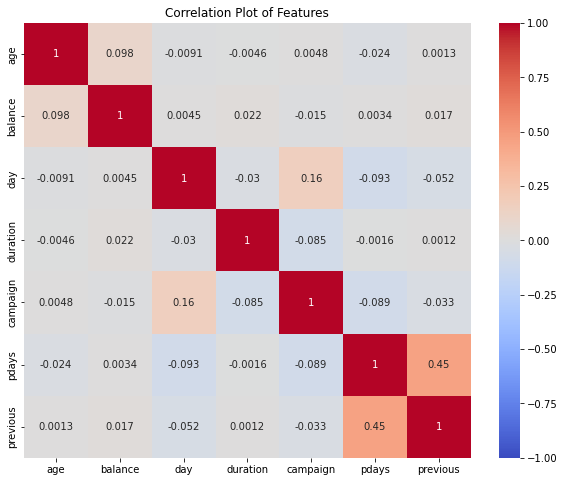

In [4]:
# Compute the correlation matrix
corr = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Plot of Features")
plt.show()